In [1]:
import yfinance as yf

In [2]:
df = yf.download('DIVO11.SA')
print(df.head())
print(df.describe())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker      DIVO11.SA  DIVO11.SA  DIVO11.SA  DIVO11.SA DIVO11.SA
Date                                                            
2012-01-31  30.700001  30.860001  30.700001  30.860001       310
2012-02-01  31.230000  31.230000  31.120001  31.120001      1040
2012-02-02  31.250000  31.299999  31.230000  31.299999      2610
2012-02-03  31.540001  31.600000  31.400000  31.400000        70
2012-02-06  31.350000  31.480000  31.350000  31.480000       250
Price         Close         High          Low         Open        Volume
Ticker    DIVO11.SA    DIVO11.SA    DIVO11.SA    DIVO11.SA     DIVO11.SA
count   3413.000000  3413.000000  3413.000000  3413.000000  3.413000e+03
mean      54.053914    54.530475    53.639912    54.097123  4.271575e+04
std       23.910128    24.036083    23.793824    23.908782  1.346635e+05
min       17.290001    17.309999    16.990000    17.209999  1.000000e+01
25%       33.540001    33.810001    33.279

In [3]:
df.columns = ['Close', 'Open', 'High', 'Low', 'Volume']

                Close       Open       High        Low  Volume
Date                                                          
2012-01-31  30.700001  30.860001  30.700001  30.860001     310
2012-02-01  31.230000  31.230000  31.120001  31.120001    1040
2012-02-02  31.250000  31.299999  31.230000  31.299999    2610
2012-02-03  31.540001  31.600000  31.400000  31.400000      70
2012-02-06  31.350000  31.480000  31.350000  31.480000     250


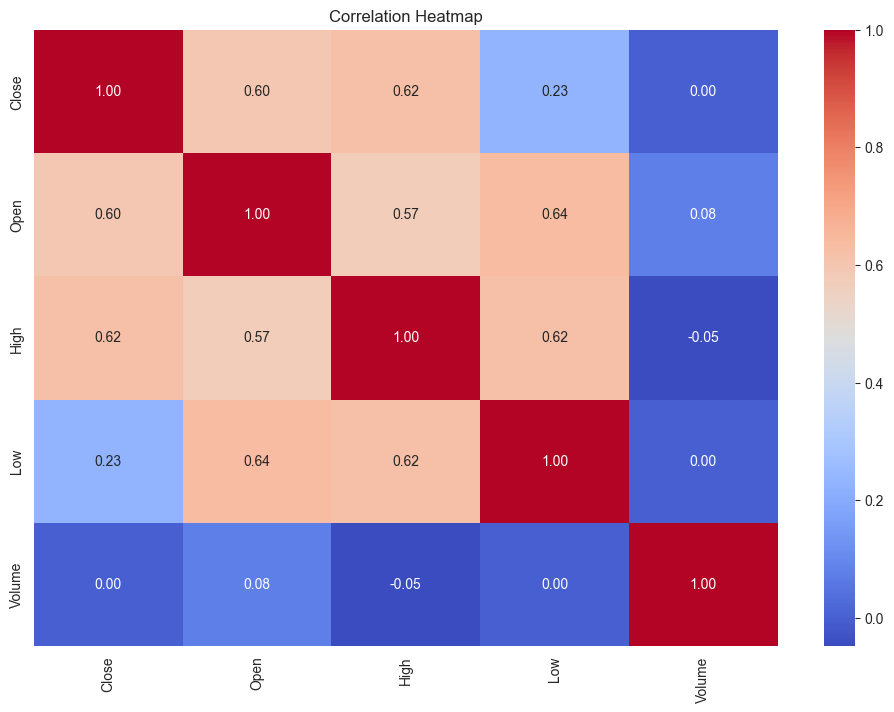

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_log = df.dropna()
df_log = np.log(df_log).diff()

plt.figure(figsize=(12, 8))
sns.heatmap(df_log.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.show()

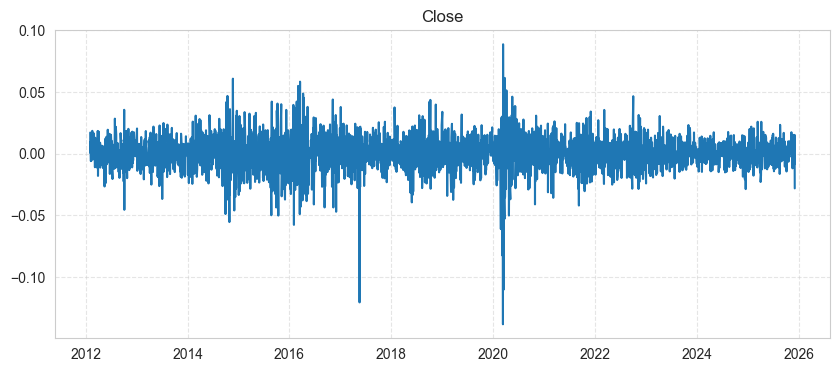

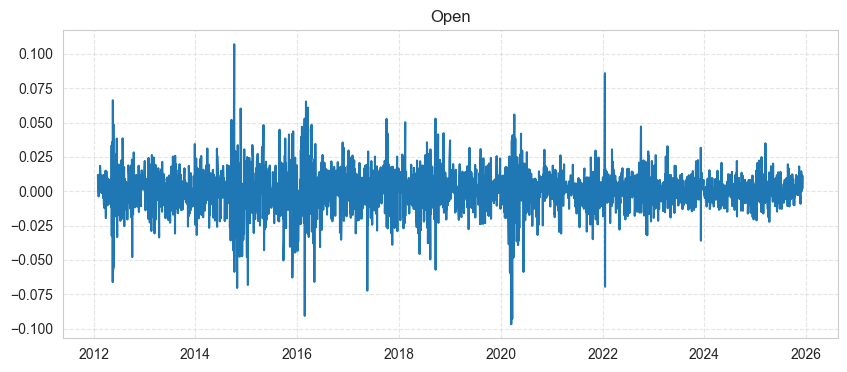

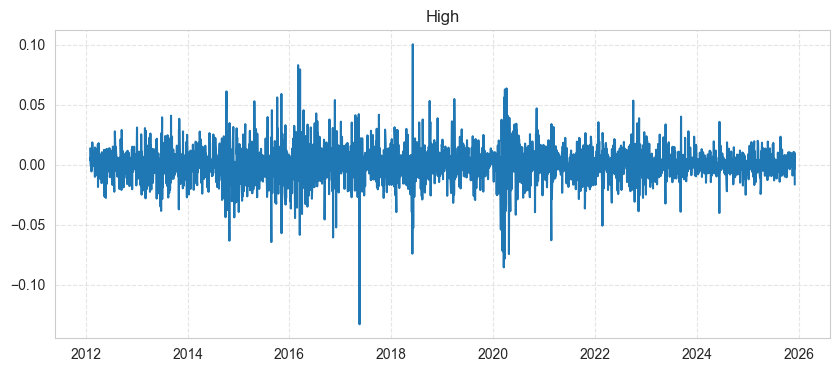

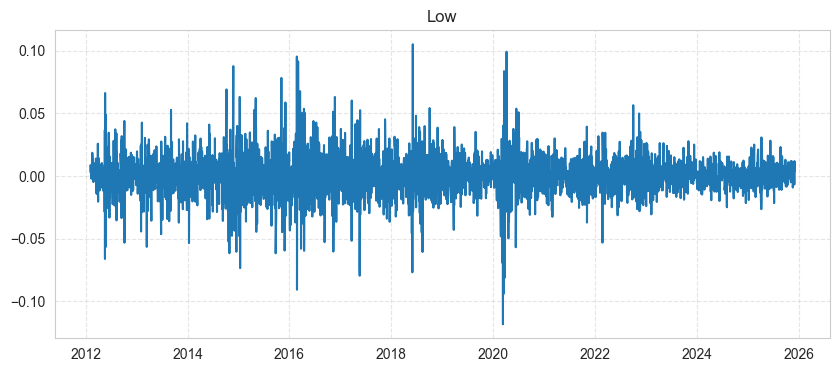

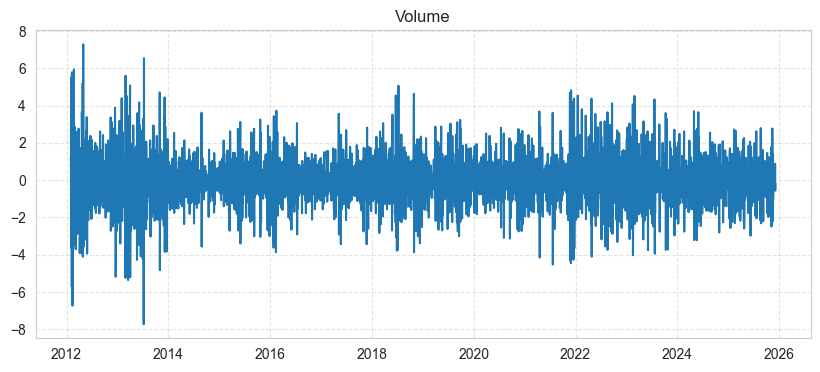

In [5]:
for column in df_log.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df_log[column], label=column)
    plt.grid(True, alpha=0.5, linestyle='--')
    plt.title(column)
    plt.show()

#### Testing for Stationarity (ADF)

In this step, we formally test whether our three transformed series are **stationary**, a key requirement before moving on to ARMA, GARCH, or VAR modeling.

The **Augmented Dickey–Fuller (ADF) test** is used to check for the presence of a **unit root** in each time series.

* $H_0$: Series has a unit root (non-stationary)

* $H_1$: Series is stationary $I(0)$

If the **p-value < 0.05**, we reject $H_0$ and conclude that the series is **stationary**.

This step ensures that our transformed variables are suitable for modeling with ARMA, GARCH, and VAR frameworks in the subsequent stages.

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    series = series.replace([np.inf, -np.inf], np.nan).dropna()

    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]:.5f}")

for col in df_log.columns:
    print(f"--- {col} ---")
    adf_test(df_log[col])
    print()

--- Close ---
ADF Statistic: -21.661204793708936
p-value: 0.00000

--- Open ---
ADF Statistic: -9.44885871405109
p-value: 0.00000

--- High ---
ADF Statistic: -58.340329892858755
p-value: 0.00000

--- Low ---
ADF Statistic: -70.09538586544883
p-value: 0.00000

--- Volume ---
ADF Statistic: -16.384383417242613
p-value: 0.00000



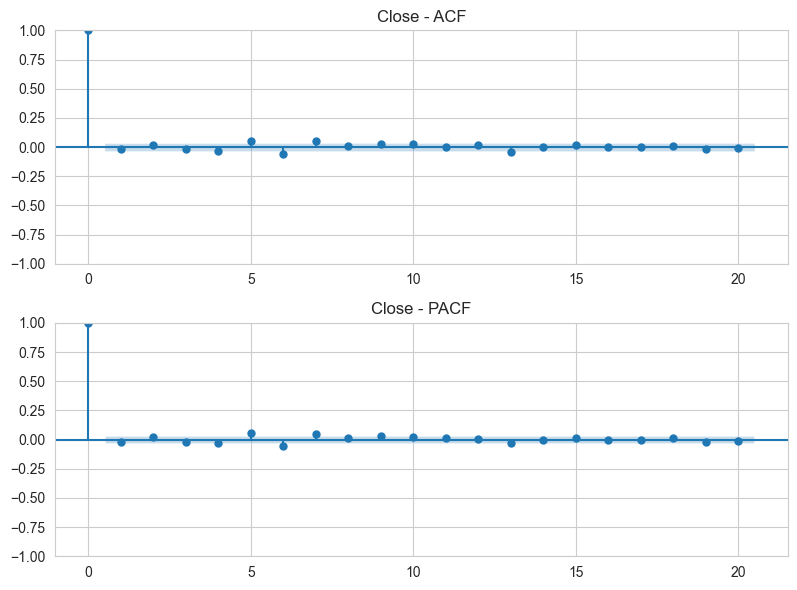

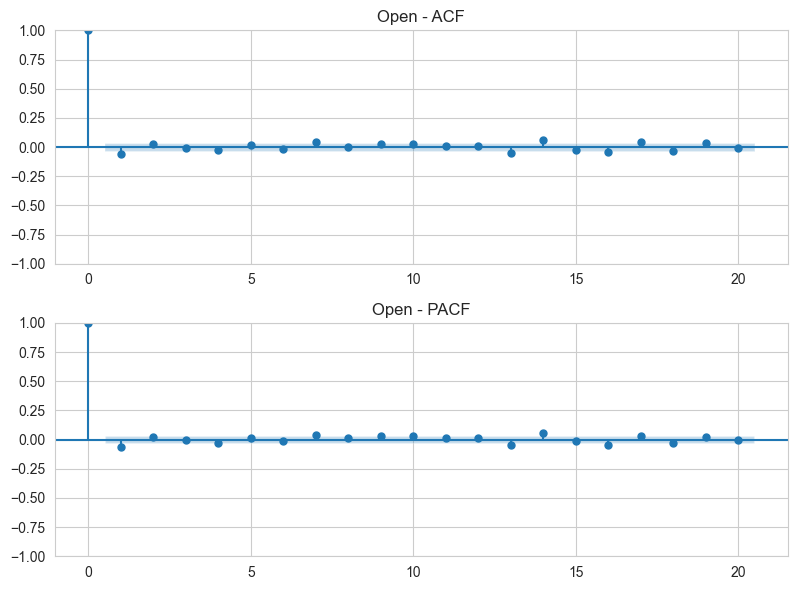

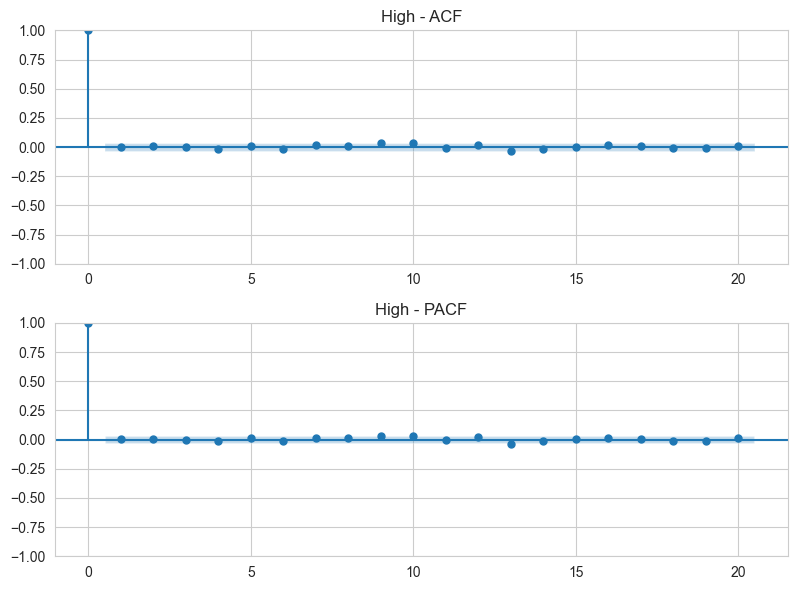

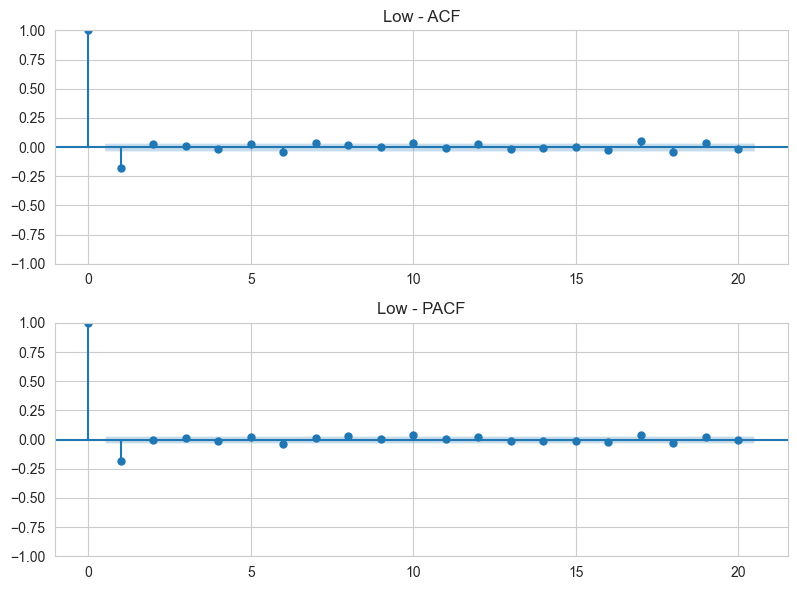

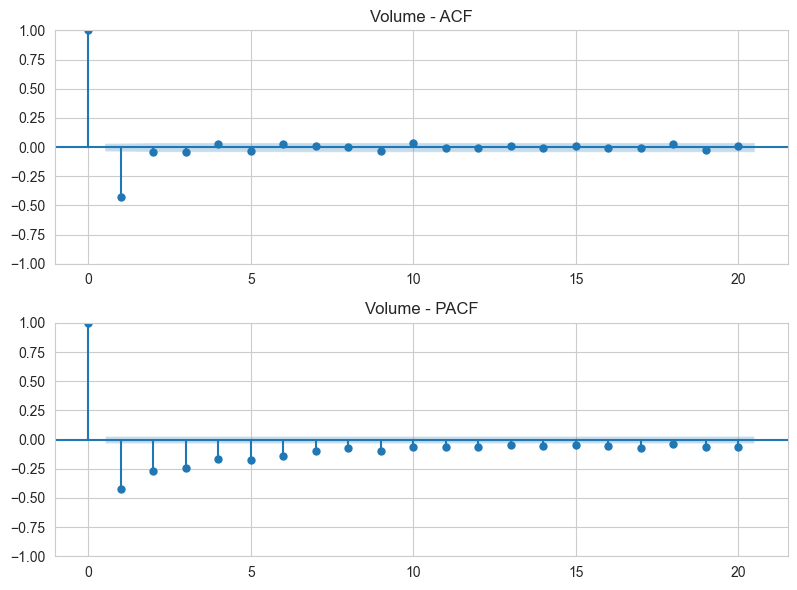

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

for col in df_log.columns:
    col_x = pd.to_numeric(df_log[col], errors="coerce").dropna()
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    plot_acf(col_x, lags=20, ax=ax[0])
    ax[0].set_title(f"{col} - ACF")
    plot_pacf(col_x, lags=20, method="ywm", ax=ax[1])
    ax[1].set_title(f"{col} - PACF")
    plt.tight_layout()
    plt.show()